In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [2]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [3]:
#assign a star a random value from the fluxes 
cluster_flux=[]
star=[]
cluster_size=2000
for i in range(cluster_size):
    cluster_flux.append(random.choice(flux_new))
    star.append(i)

In [4]:
#convert flux to mag
cluster_mag=[]
for i in range(len(cluster_flux)):
    mag=-2.5*np.log10(cluster_flux[i])
    cluster_mag.append(mag)

In [6]:
def my_probability(burst,bins,duration):
    prob=(1/(2*bins))/((burst-((burst-1)/(2*bins))))/duration
    return prob

In [12]:
#make multi dimensional array for burst prob 
#let 1 be unburst and NaN be burst
t=300 #yrs
cadence=2
steps=t*cadence
prob1=my_probability(100,1,100)/cadence
prob2=my_probability(100,2,100)/cadence
prob3=my_probability(100,3,100)/cadence
prob4=my_probability(100,4,100)/cadence
prob5=my_probability(100,5,100)/cadence
prob6=my_probability(100,6,100)/cadence

burst1=np.ones((cluster_size,steps))
L1=np.zeros((cluster_size,steps))
burst2=np.ones((cluster_size,steps))
L2=np.zeros((cluster_size,steps))
burst3=np.ones((cluster_size,steps))
L3=np.zeros((cluster_size,steps))
burst4=np.ones((cluster_size,steps))
L4=np.zeros((cluster_size,steps))
burst5=np.ones((cluster_size,steps))
L5=np.zeros((cluster_size,steps))
burst6=np.ones((cluster_size,steps))
L6=np.zeros((cluster_size,steps))

In [13]:
#1 bin
for i in range(steps):
    for j in range(cluster_size):
        if burst1[j,i]==1:
            prob=random.random()
            if prob>prob1:
                burst1[j,i]=burst1[j,i]
                L1[j,i]=cluster_mag[j]
            if prob<=prob1:
                burst1[j,i:200+i]=np.nan
                L1[j,i:200+i]=cluster_mag[j]-5
                
#2 bins
for i in range(steps):
    for j in range(cluster_size):
        if burst2[j,i]==1:
            prob=random.random()
            if prob>prob2:
                burst2[j,i]=burst2[j,i]
                L2[j,i]=cluster_mag[j]
            if prob<=prob2:
                burst2[j,i:200+i]=np.nan
                L2[j,i:200+i]=cluster_mag[j]-5
                
#3 bins
for i in range(steps):
    for j in range(cluster_size):
        if burst3[j,i]==1:
            prob=random.random()
            if prob>prob3:
                burst3[j,i]=burst3[j,i]
                L3[j,i]=cluster_mag[j]
            if prob<=prob3:
                burst3[j,i:200+i]=np.nan
                L3[j,i:200+i]=cluster_mag[j]-5
                
#4 bins
for i in range(steps):
    for j in range(cluster_size):
        if burst4[j,i]==1:
            prob=random.random()
            if prob>prob4:
                burst4[j,i]=burst4[j,i]
                L4[j,i]=cluster_mag[j]
            if prob<=prob4:
                burst4[j,i:200+i]=np.nan
                L4[j,i:200+i]=cluster_mag[j]-5
                                
#5 bins
for i in range(steps):
    for j in range(cluster_size):
        if burst5[j,i]==1:
            prob=random.random()
            if prob>prob5:
                burst5[j,i]=burst5[j,i]
                L5[j,i]=cluster_mag[j]
            if prob<=prob5:
                burst5[j,i:200+i]=np.nan
                L5[j,i:200+i]=cluster_mag[j]-5
                
#6 bins
for i in range(steps):
    for j in range(cluster_size):
        if burst6[j,i]==1:
            prob=random.random()
            if prob>prob6:
                burst6[j,i]=burst6[j,i]
                L6[j,i]=cluster_mag[j]
            if prob<=prob6:
                burst6[j,i:200+i]=np.nan
                L6[j,i:200+i]=cluster_mag[j]-5

In [16]:
#determine total number of bursts 
total1=0
total2=0
total3=0
total4=0
total5=0
total6=0
burst_total1=[]
burst_total2=[]
burst_total3=[]
burst_total4=[]
burst_total5=[]
burst_total6=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst1[j,i])==True and burst1[j,i-1]==1:
            total1+=1
        elif np.isnan(burst2[j,i])==True and burst2[j,i-1]==1:
            total2+=1
        elif np.isnan(burst3[j,i])==True and burst3[j,i-1]==1:
            total3+=1
        elif np.isnan(burst4[j,i])==True and burst4[j,i-1]==1:
            total4+=1
        elif np.isnan(burst5[j,i])==True and burst5[j,i-1]==1:
            total5+=1
        elif np.isnan(burst6[j,i])==True and burst6[j,i-1]==1:
            total6+=1
    burst_total1.append(total1)
    burst_total2.append(total2)
    burst_total3.append(total3)
    burst_total4.append(total4)
    burst_total5.append(total5)
    burst_total6.append(total6)

In [17]:
#find the fraction at a time
burst_fraction1=[]
fraction_val1=0
burst_fraction2=[]
fraction_val2=0
burst_fraction3=[]
fraction_val3=0
burst_fraction4=[]
fraction_val4=0
burst_fraction5=[]
fraction_val5=0
burst_fraction6=[]
fraction_val6=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst1[j,i])==True:
            fraction_val1+=1
        elif np.isnan(burst2[j,i])==True:
            fraction_val2+=1
        elif np.isnan(burst3[j,i])==True:
            fraction_val3+=1
        elif np.isnan(burst4[j,i])==True:
            fraction_val4+=1
        elif np.isnan(burst5[j,i])==True:
            fraction_val5+=1
        elif np.isnan(burst6[j,i])==True:
            fraction_val6+=1
    burst_fraction1.append(fraction_val1)
    fraction_val1=0
    burst_fraction2.append(fraction_val2)
    fraction_val2=0
    burst_fraction3.append(fraction_val3)
    fraction_val3=0
    burst_fraction4.append(fraction_val4)
    fraction_val4=0
    burst_fraction5.append(fraction_val5)
    fraction_val5=0
    burst_fraction6.append(fraction_val6)
    fraction_val6=0

In [18]:
fraction1=[]
fraction2=[]
fraction3=[]
fraction4=[]
fraction5=[]
fraction6=[]
for i in range(len(burst_fraction1)):
    fraction1.append(burst_fraction1[i]/cluster_size)
    fraction2.append(burst_fraction2[i]/cluster_size)
    fraction3.append(burst_fraction3[i]/cluster_size)
    fraction4.append(burst_fraction4[i]/cluster_size)
    fraction5.append(burst_fraction5[i]/cluster_size)
    fraction6.append(burst_fraction6[i]/cluster_size)

Text(0.5, 1.0, 'Fraction of stars undergoing FU Ori burst for different bins')

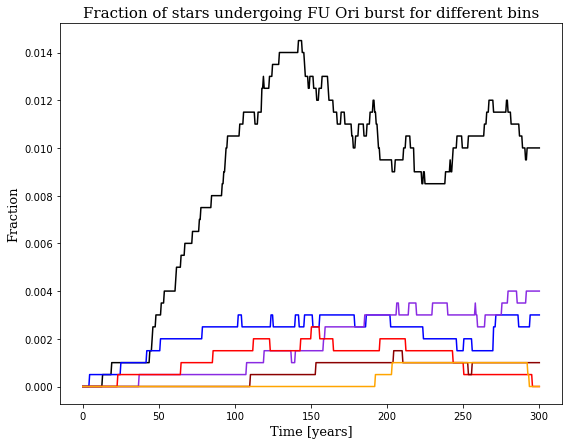

In [24]:
time=np.linspace(0,t,steps)
#text="t={} years".format(t)
title='Fraction of stars undergoing FU Ori burst for different bins'
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction1,color='black',label='1 bin')
ax.plot(time,fraction2,color='blue',label='2 bins')
ax.plot(time,fraction3,color='blueviolet',label='3 bins')
ax.plot(time,fraction4,color='red',label='4 bins')
ax.plot(time,fraction5,color='darkred',label='5 bins')
ax.plot(time,fraction6,color='orange',label='6 bins')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
#ax.text(t,0,text,font='serif',fontsize=12,ha='right')
#plt.savefig('/Users/rachellee/Desktop/fraction_bursts.jpeg',dpi=300)

In [31]:
burst1=np.ones((cluster_size,steps))
L1=np.zeros((cluster_size,steps))
burst2=np.ones((cluster_size,steps))
L2=np.zeros((cluster_size,steps))
burst3=np.ones((cluster_size,steps))
L3=np.zeros((cluster_size,steps))
burst4=np.ones((cluster_size,steps))
L4=np.zeros((cluster_size,steps))
burst5=np.ones((cluster_size,steps))
L5=np.zeros((cluster_size,steps))
burst6=np.ones((cluster_size,steps))
L6=np.zeros((cluster_size,steps))

#run it 50 times
#start with function
def bursts(full_time,size,probability,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob=probability
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                if prob<=burst_prob:
                    burst[j,i:200+i]=np.nan
                    L[j,i]=cluster_mag[j]-5
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
    #find the fraction at a time
    burst_fraction=[]
    fraction_val=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True:
                fraction_val+=1
        burst_fraction.append(fraction_val)
        fraction_val=0
    fraction=[]
    for i in range(len(burst_fraction)):
        fraction.append(burst_fraction[i]/cluster_size)
        
    return burst_total,burst_fraction,fraction

In [42]:
run=50
t=300

In [66]:
#1 bin
burst_total1=[]
burst_fraction1=[]
fraction1=[]

for i in range(run):
    burst1=np.ones((cluster_size,steps))
    L1=np.zeros((cluster_size,steps))
    values1=bursts(t,2000,prob1,L1,burst1)
    burst_total1.append(values1[0])
    burst_fraction1.append(values1[1])
    fraction1.append(values1[2])

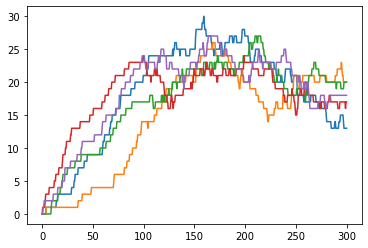

In [67]:
time=np.linspace(0,t,steps)
plt.plot(time,burst_fraction1[0])
plt.plot(time,burst_fraction1[1])
plt.plot(time,burst_fraction1[2])
plt.plot(time,burst_fraction1[3])
plt.plot(time,burst_fraction1[4])

In [68]:
#calculate the mean of each time step
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*2) for i in t_list_years]

In [69]:
cadence_frac_bursts1=[]
for i in range(0,4):
    for j in t_list_cadence:
        cadence_frac_bursts1.append(fraction1[i][j])

In [70]:
mean_frac1=np.mean(cadence_frac_bursts1)
std_frac1=np.std(cadence_frac_bursts1)

In [71]:
#2 bin
burst_total2=[]
burst_fraction2=[]
fraction2=[]

for i in range(run):
    burst2=np.ones((cluster_size,steps))
    L2=np.zeros((cluster_size,steps))
    values2=bursts(t,2000,prob2,L2,burst2)
    burst_total2.append(values2[0])
    burst_fraction2.append(values2[1])
    fraction2.append(values2[2])
    
cadence_frac_bursts2=[]
for i in range(0,4):
    for j in t_list_cadence:
        cadence_frac_bursts2.append(fraction2[i][j])

mean_frac2=np.mean(cadence_frac_bursts2)
std_frac2=np.std(cadence_frac_bursts2)

In [72]:
#3 bin
burst_total3=[]
burst_fraction3=[]
fraction3=[]

for i in range(run):
    burst3=np.ones((cluster_size,steps))
    L3=np.zeros((cluster_size,steps))
    values3=bursts(t,2000,prob3,L3,burst3)
    burst_total3.append(values3[0])
    burst_fraction3.append(values3[1])
    fraction3.append(values3[2])
    
cadence_frac_bursts3=[]
for i in range(0,4):
    for j in t_list_cadence:
        cadence_frac_bursts3.append(fraction3[i][j])

mean_frac3=np.mean(cadence_frac_bursts3)
std_frac3=np.std(cadence_frac_bursts3)

In [73]:
#4 bin
burst_total4=[]
burst_fraction4=[]
fraction4=[]

for i in range(run):
    burst4=np.ones((cluster_size,steps))
    L4=np.zeros((cluster_size,steps))
    values4=bursts(t,2000,prob4,L4,burst4)
    burst_total4.append(values4[0])
    burst_fraction4.append(values4[1])
    fraction4.append(values4[2])
    
cadence_frac_bursts4=[]
for i in range(0,4):
    for j in t_list_cadence:
        cadence_frac_bursts4.append(fraction4[i][j])

mean_frac4=np.mean(cadence_frac_bursts4)
std_frac4=np.std(cadence_frac_bursts4)

In [74]:
#5 bin
burst_total5=[]
burst_fraction5=[]
fraction5=[]

for i in range(run):
    burst5=np.ones((cluster_size,steps))
    L5=np.zeros((cluster_size,steps))
    values5=bursts(t,2000,prob5,L5,burst5)
    burst_total5.append(values5[0])
    burst_fraction5.append(values5[1])
    fraction5.append(values5[2])
    
cadence_frac_bursts5=[]
for i in range(0,4):
    for j in t_list_cadence:
        cadence_frac_bursts5.append(fraction5[i][j])

mean_frac5=np.mean(cadence_frac_bursts5)
std_frac5=np.std(cadence_frac_bursts5)

In [75]:
#6 bin
burst_total6=[]
burst_fraction6=[]
fraction6=[]

for i in range(run):
    burst6=np.ones((cluster_size,steps))
    L6=np.zeros((cluster_size,steps))
    values6=bursts(t,2000,prob6,L6,burst6)
    burst_total6.append(values6[0])
    burst_fraction6.append(values6[1])
    fraction6.append(values6[2])
    
cadence_frac_bursts6=[]
for i in range(0,4):
    for j in t_list_cadence:
        cadence_frac_bursts6.append(fraction6[i][j])

mean_frac6=np.mean(cadence_frac_bursts6)
std_frac6=np.std(cadence_frac_bursts6)

In [76]:
mean_frac=[mean_frac1,mean_frac2,mean_frac3,mean_frac4,mean_frac5,mean_frac6]
std_frac=[std_frac1,std_frac2,std_frac3,std_frac4,std_frac5,std_frac6]
number=[1,2,3,4,5,6]

Text(0.5, 1.0, 'Mean Fraction of Stars with 100x Burst for Different Cluster Sizes')

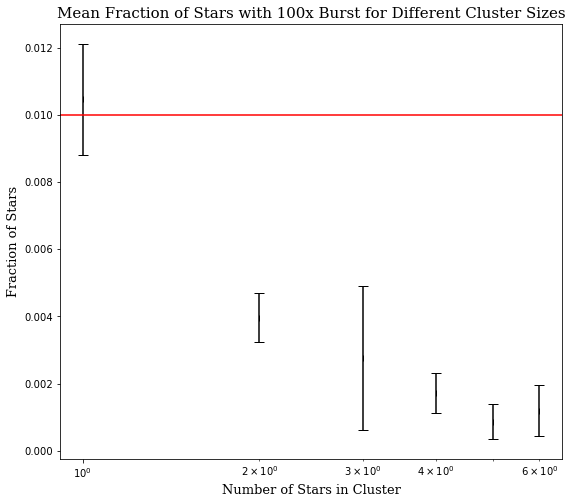

In [77]:
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
ax.errorbar(number,mean_frac,yerr=std_frac,fmt='|',capsize=5,color='black')
ax.axhline(0.01,color='red')
plt.xticks([1,2,3,4,5,6,],['1','2','3','4','5','6'])
ax.set_xscale('log')
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Fraction of stars',font='serif',fontsize=13)
ax.set_title('Fraction of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.savefig('/Users/rachellee/Desktop/errorbar_plot_50run_clustersize.jpeg')

[]

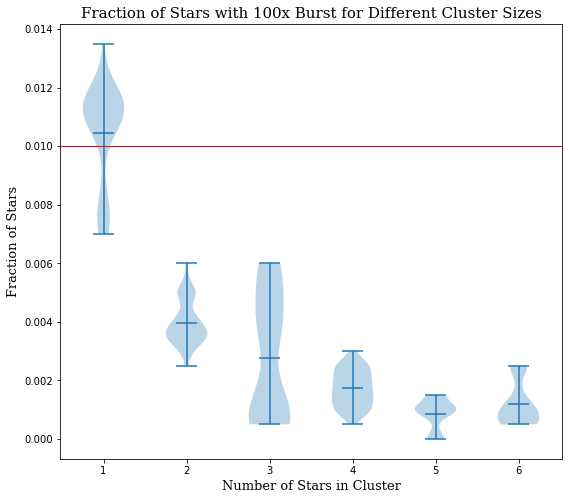

In [78]:
data=[cadence_frac_bursts1,cadence_frac_bursts2,cadence_frac_bursts3,cadence_frac_bursts4,\
      cadence_frac_bursts5,cadence_frac_bursts6]
labels=[1,2,3,4,5,6]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
ax.violinplot(data,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Fraction of Stars',font='serif',fontsize=13)
ax.set_title('Fraction of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()
plt.savefig('/Users/rachellee/Desktop/violin_plot_50run_clustersize.jpeg')